### Graphviz 설치

In [ ]:
# 트리 시각화 도구 설치
# 1. graphviz.org에서 graphviz 도구 다운로드 및 설치
# 2. python package 설치
# !pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


# 트리모델

### 분류 (먼저)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [7]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer     # breast_cancer 분류 연습용 데이터

bc_dataset = load_breast_cancer()

X = bc_dataset['data']
y = bc_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [8]:
# 모델 훈련 (학습)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')   # criterion default : gini

dtc.fit(X_train, y_train)

dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.9300699300699301)

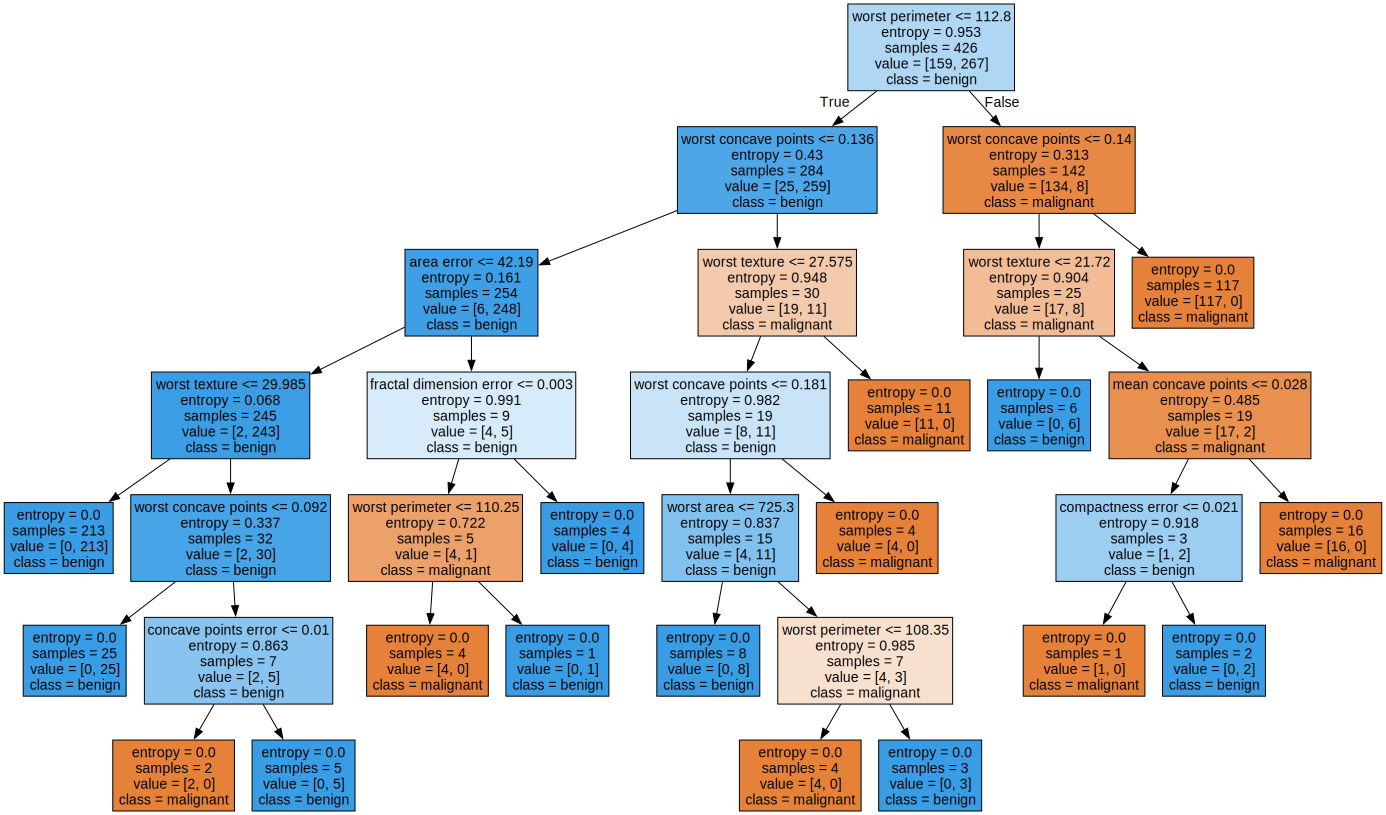

In [ ]:
# 모델 시각화 - entropy
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtc, out_file = "models/breast-cancer-model.dot",
                class_names = bc_dataset['target_names'],
                feature_names = bc_dataset['feature_names'],
                filled = True)  # filled는 꾸미기용

with open('models/breast-cancer-model.dot') as f:
    tree_graph_data = f.read()

graphviz.Source(tree_graph_data)

In [15]:
# 모델 훈련 (학습)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini')   # criterion default : gini

dtc.fit(X_train, y_train)

dtc.score(X_train, y_train), dtc.score(X_test, y_test)


(1.0, 0.9300699300699301)

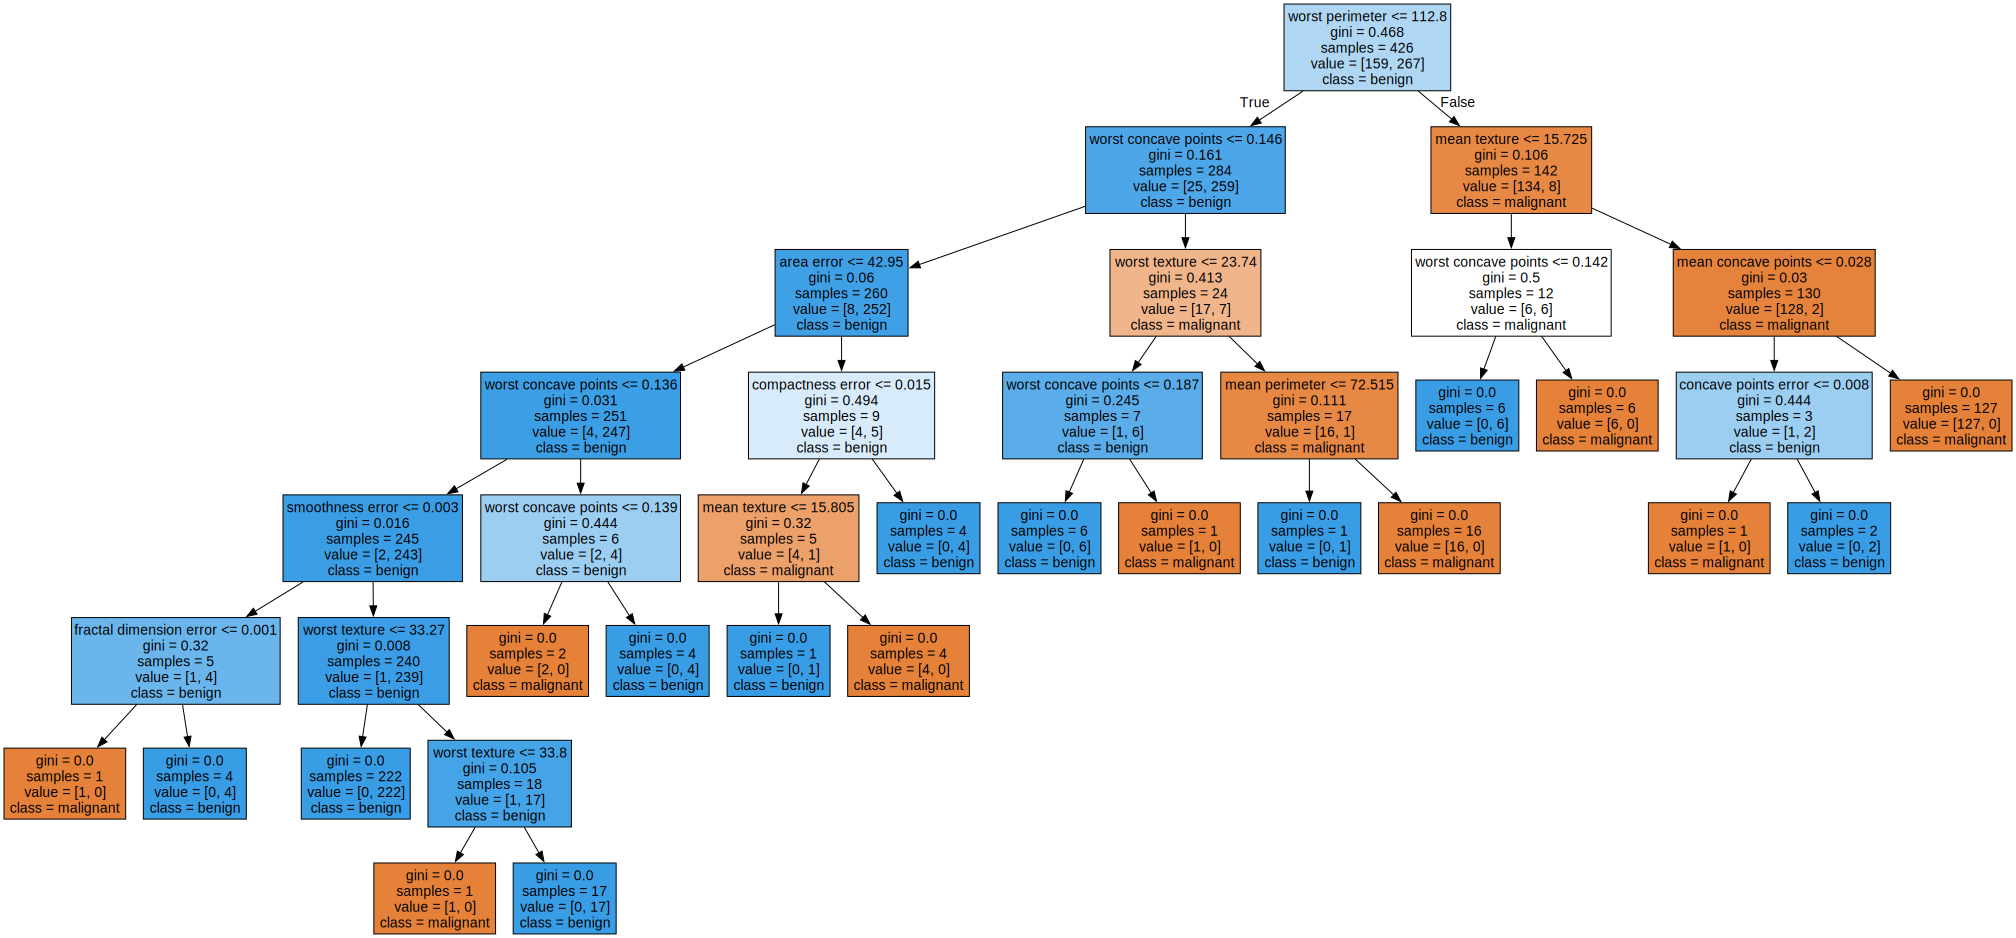

In [16]:
# 모델 시각화 - gini
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtc, out_file = "models/breast-cancer-model.dot",
                class_names = bc_dataset['target_names'],
                feature_names = bc_dataset['feature_names'],
                filled = True)  # filled는 꾸미기용

with open('models/breast-cancer-model.dot') as f:
    tree_graph_data = f.read()

graphviz.Source(tree_graph_data)

트리 복잡도 제어

In [34]:
# dtc2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

dtc2.fit(X_train, y_train)
dtc2.score(X_train, y_train), dtc2.score(X_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [36]:
# 특성 중요도 출력
for fn, fi in zip(bc_dataset['feature_names'], dtc2.feature_importances_):
    print("{0} : {1}".format(fn, fi))

mean radius : 0.0
mean texture : 0.0
mean perimeter : 0.0
mean area : 0.0
mean smoothness : 0.0
mean compactness : 0.0
mean concavity : 0.0
mean concave points : 0.0
mean symmetry : 0.0
mean fractal dimension : 0.0
radius error : 0.0
texture error : 0.05103680493153673
perimeter error : 0.0
area error : 0.00807144750312093
smoothness error : 0.0020153132952080268
compactness error : 0.0
concavity error : 0.0
concave points error : 0.0
symmetry error : 0.0
fractal dimension error : 0.0
worst radius : 0.7431922188156047
worst texture : 0.034530864360105155
worst perimeter : 0.0
worst area : 0.006433976227515072
worst smoothness : 0.011259458398151368
worst compactness : 0.0
worst concavity : 0.01859747873062752
worst concave points : 0.12486243773813062
worst symmetry : 0.0
worst fractal dimension : 0.0


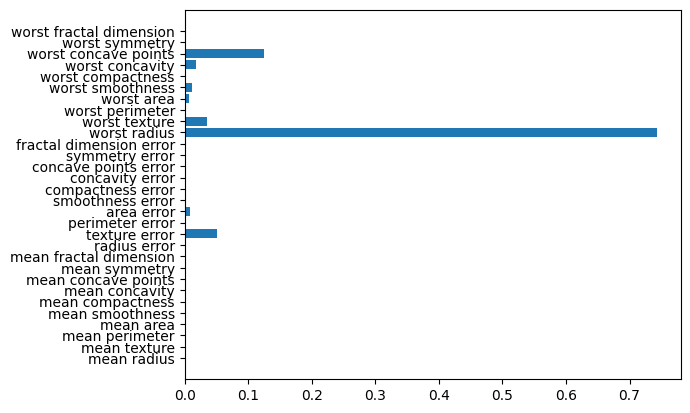

In [37]:
# 특성 중요도 시각화
plt.barh(bc_dataset['feature_names'], dtc2.feature_importances_)
plt.show()